Cardio Good Fitness Case Study
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness.

The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics.

The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months.

The data are stored in the CardioGoodFitness.csv file

In [1]:
#IMPORT THE LIBRARIES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cardiodata = pd.read_csv('CardioGoodFitness.csv')

INSPECT THE DATASET

In [3]:
print(cardiodata.head())


  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47


In [4]:
print(cardiodata.info())
print(cardiodata.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%    

In [5]:
# Check for missing values
print("\nMissing Values:\n", cardiodata.isnull().sum())



Missing Values:
 Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


It is observed that there is no missing value.

#### Data visualization

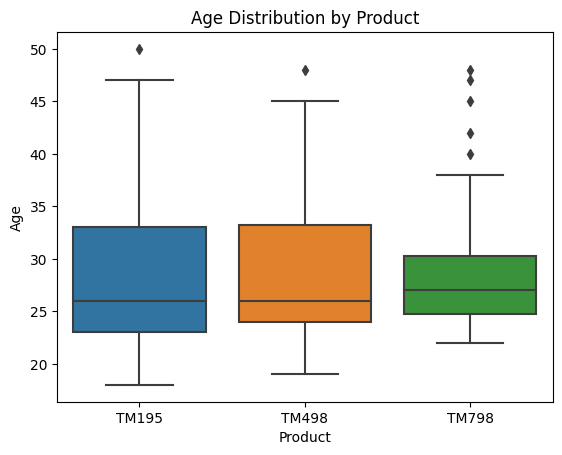

In [6]:
# Customer demographics by product
sns.boxplot(data=cardiodata, x='Product', y='Age')
plt.title("Age Distribution by Product")
plt.show()

It is observed that there are many outliers in TM798 as demonstrated in the above boxplot; which calls for further analysis.

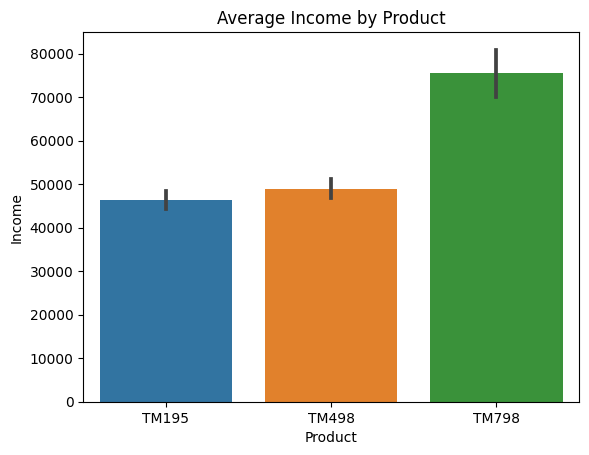

In [7]:
sns.barplot(data=cardiodata, x='Product', y='Income')
plt.title("Average Income by Product")
plt.show()

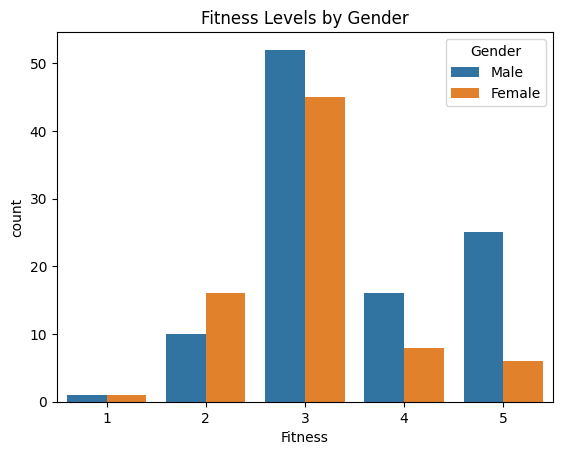

In [8]:
# Fitness levels by gender
sns.countplot(data=cardiodata, x='Fitness', hue='Gender')
plt.title("Fitness Levels by Gender")
plt.show()

The Male gender are majorly fit when compared to the female gender.

### Clustering analysis

This is done to identify certain patterns within the data distribution.

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [10]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cardiodata[['Age', 'Education', 'Income', 'Miles']])

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
cardiodata['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


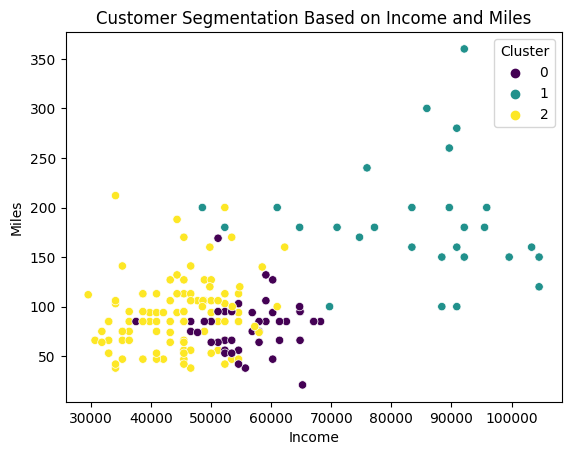

In [11]:
# Visualize clusters
sns.scatterplot(data=cardiodata, x='Income', y='Miles', hue='Cluster', palette='viridis')
plt.title("Customer Segmentation Based on Income and Miles")
plt.show()

In [12]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cardiodata[['Age', 'Education', 'Income', 'Miles']])

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
cardiodata['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


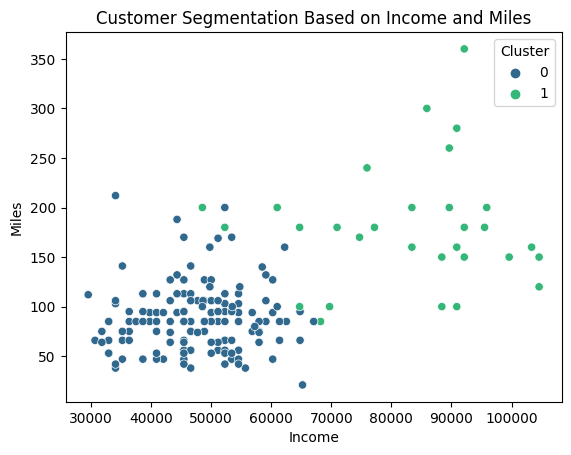

In [13]:
# Visualize clusters
sns.scatterplot(data=cardiodata, x='Income', y='Miles', hue='Cluster', palette='viridis')
plt.title("Customer Segmentation Based on Income and Miles")
plt.show()

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

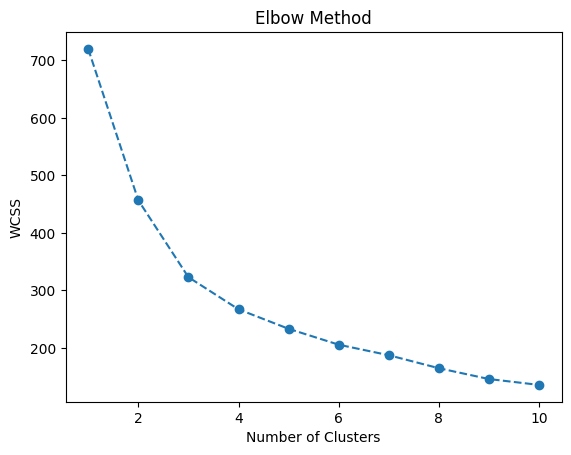

In [14]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [15]:
# Silhouette Score for the chosen number of clusters
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, labels)
print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.2f}")


Silhouette Score for 2 clusters: 0.46


C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


It suggests that the clusters are somewhat distinct but not very well-separated.
There may be overlapping or poorly defined cluster boundaries such Feature Overlap(e.g., age, income, miles),cluster Structure and scaling Issues; causing one feature to dominate.

 Predictive Modeling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Prepare data for modeling
X = cardiodata[['Age', 'Education', 'Income', 'Miles']]
y = cardiodata['Product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Evaluate model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       TM195       0.74      0.80      0.77        25
       TM498       0.50      0.47      0.48        15
       TM798       0.92      0.86      0.89        14

    accuracy                           0.72        54
   macro avg       0.72      0.71      0.71        54
weighted avg       0.72      0.72      0.72        54

Confusion Matrix:
 [[20  5  0]
 [ 7  7  1]
 [ 0  2 12]]


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

# Cross-Validation for Random Forest
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy Scores: [0.65384615 0.56       0.68       0.6        0.6       ]
Mean CV Accuracy: 0.62


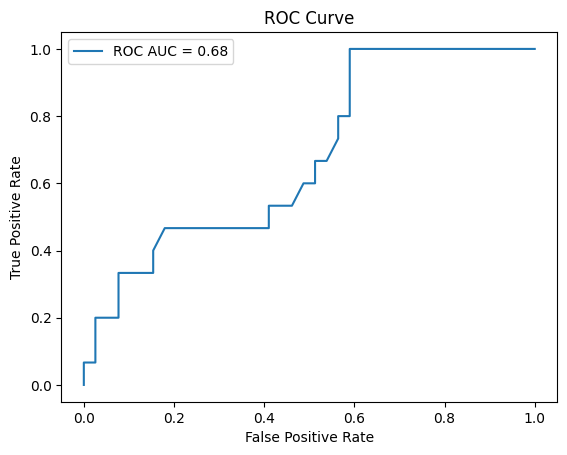

In [21]:
# Final Model ROC and AUC
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(pd.get_dummies(y_test).iloc[:, 1], y_pred_proba)
roc_auc = roc_auc_score(pd.get_dummies(y_test).iloc[:, 1], y_pred_proba)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


AUC between 0.5 and 0.7: The model has a fair performance but is not very reliable.

In [22]:
# Classification Report and Confusion Matrix
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       TM195       0.74      0.80      0.77        25
       TM498       0.50      0.47      0.48        15
       TM798       0.92      0.86      0.89        14

    accuracy                           0.72        54
   macro avg       0.72      0.71      0.71        54
weighted avg       0.72      0.72      0.72        54

Confusion Matrix:
 [[20  5  0]
 [ 7  7  1]
 [ 0  2 12]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

In [24]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [25]:
# Apply GridSearchCV
#grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
#grid_search.fit(X_train, y_train)

In [26]:
# Print the best parameters and best score
#print("Best Parameters: ", grid_search.best_params_)
#print("Best Score: ", grid_search.best_score_)

# Use the best model
#best_rf_model = grid_search.best_estimator_

GridSearchCV was Ignored due to time of computation instead I opted for RandomizedSearchCV

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters:  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 901}
Best Score:  0.683076923076923


In [28]:
# Use the best model
best_rf_model_random = random_search.best_estimator_

EVALUATE THE MODEL 

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions with the best model
y_pred = best_rf_model_random.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.7037037037037037
Classification Report: 
               precision    recall  f1-score   support

       TM195       0.76      0.76      0.76        25
       TM498       0.50      0.47      0.48        15
       TM798       0.80      0.86      0.83        14

    accuracy                           0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54

Confusion Matrix: 
 [[19  5  1]
 [ 6  7  2]
 [ 0  2 12]]
